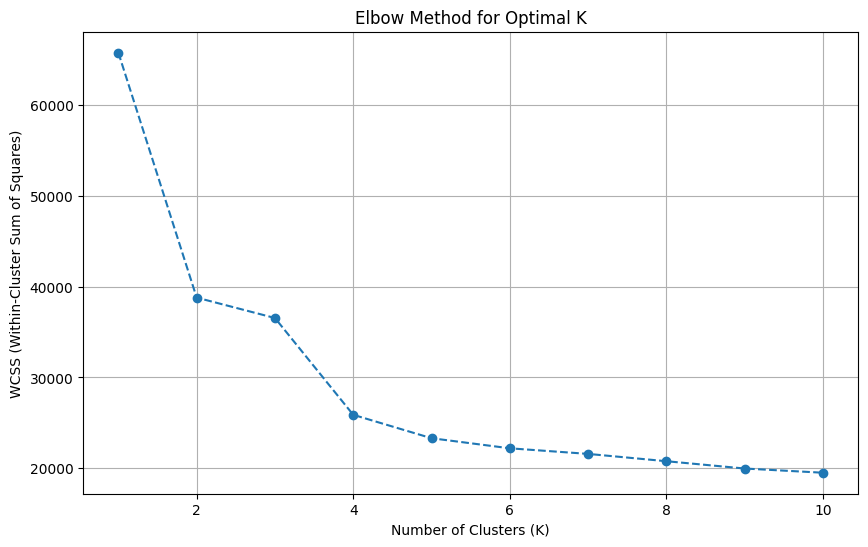

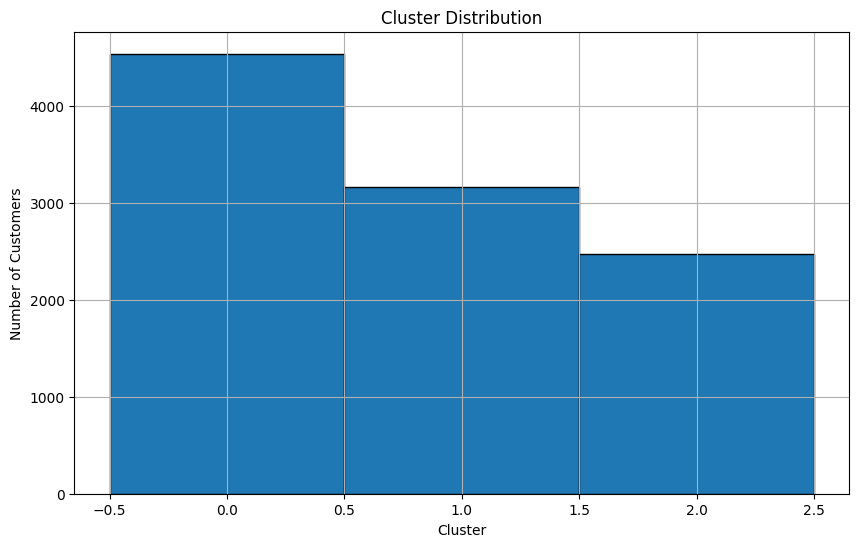

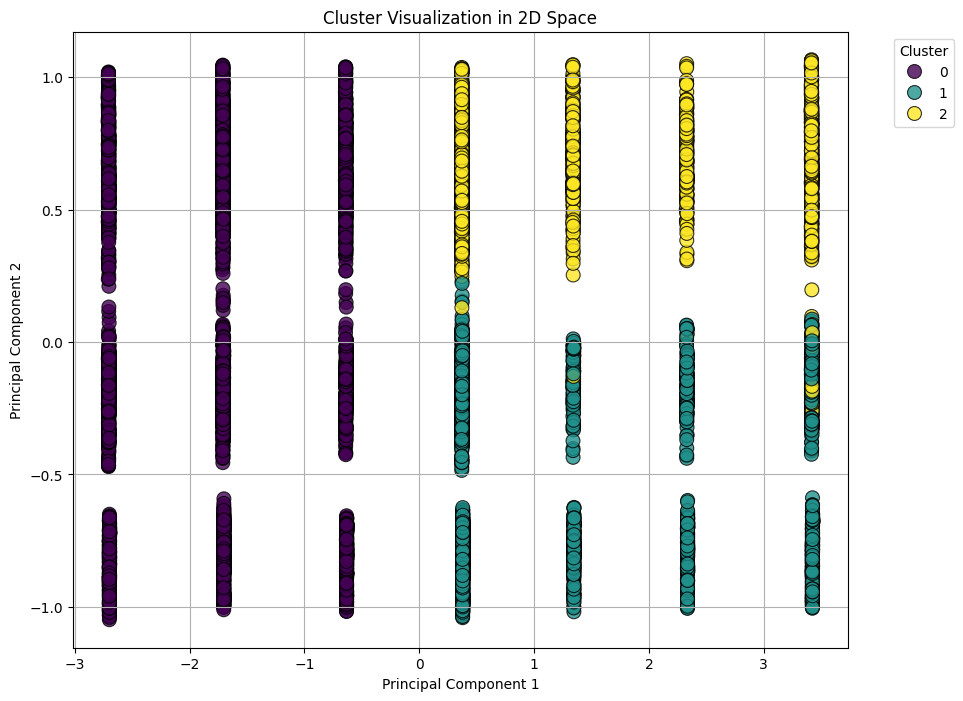

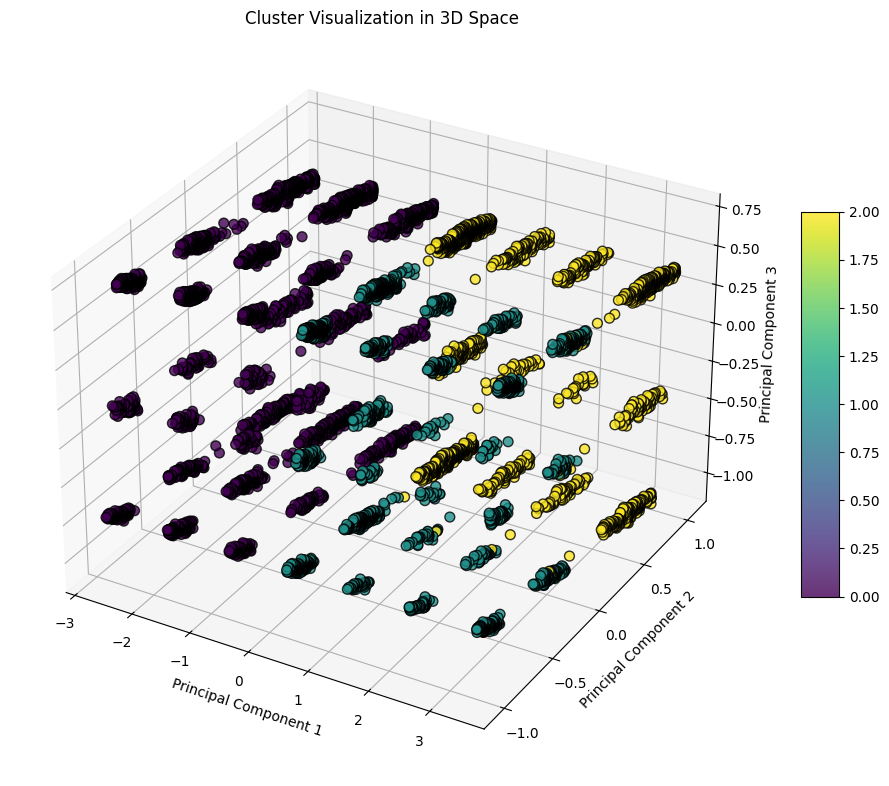

Cluster Summary:
         Customer_Age  Dependent_count  Months_on_book  \
Cluster                                                  
0            0.063114         0.467402        0.532545   
1            0.063990         0.460790        0.535097   
2            0.063984         0.483712        0.530794   

         Total_Relationship_Count  Months_Inactive_12_mon  \
Cluster                                                     
0                        0.561800                0.391192   
1                        0.560000                0.393049   
2                        0.567909                0.384995   

         Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Cluster                                                             
0                     0.409241      0.219823             0.463764   
1                     0.406530      0.108491             0.451452   
2                     0.413020      0.353008             0.471177   

         Total_Amt_Chng_Q4_Q1  Total_Tra

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Step 1: Load the Dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Files/CreditPrediction.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Step 2: Define Features
numerical_cols = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category']
data = data[numerical_cols + categorical_cols]

# Step 3: Handle Missing Values
# Fill numerical columns with the median
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill categorical columns with the mode
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Step 4: Feature Engineering
# Add a binary column for inactivity
data['Is_Fully_Inactive'] = (data['Months_Inactive_12_mon'] == 12).astype(int)

# Step 5: Encode Categorical Features
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = one_hot_encoder.fit_transform(data[categorical_cols])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Ordinal encode Education_Level
education_levels = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown']
ordinal_encoder = OrdinalEncoder(categories=[education_levels])
data['Education_Level'] = ordinal_encoder.fit_transform(data[['Education_Level']])

# Step 6: Normalize Numerical Features
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Combine all processed features
processed_features = pd.concat([data[numerical_cols], data[['Education_Level', 'Is_Fully_Inactive']], categorical_encoded_df], axis=1)

# Step 7: Determine Optimal Number of Clusters (Elbow Method)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_features)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Step 8: Apply K-Means Clustering
optimal_k = 3  # Replace with the chosen K from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(processed_features)
processed_features['Cluster'] = clusters

# Step 9: Visualize Cluster Distribution
plt.figure(figsize=(10, 6))
plt.hist(clusters, bins=range(optimal_k + 1), align='left', edgecolor='black')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# Step 10: 2D Visualization Using PCA
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(processed_features.drop(columns=['Cluster']))
reduced_features_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
reduced_features_df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(data=reduced_features_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='k')
plt.title('Cluster Visualization in 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Step 11: 3D Visualization Using PCA
pca_3d = PCA(n_components=3, random_state=42)
reduced_features_3d = pca_3d.fit_transform(processed_features.drop(columns=['Cluster']))
reduced_features_3d_df = pd.DataFrame(reduced_features_3d, columns=['PCA1', 'PCA2', 'PCA3'])
reduced_features_3d_df['Cluster'] = clusters

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d_df['PCA1'],
    reduced_features_3d_df['PCA2'],
    reduced_features_3d_df['PCA3'],
    c=reduced_features_3d_df['Cluster'], cmap='viridis', s=50, alpha=0.8, edgecolor='k'
)
ax.set_title('Cluster Visualization in 3D Space')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
plt.show()

# Step 12: Analyze Clusters
cluster_summary = processed_features.groupby('Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)


In [ ]:
!pip install shap lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b66fe6db703cd5d607618facc2518e72a93aa6cf1ddfdf87247fecf9789114c2
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


  0%|          | 0/100 [00:00<?, ?it/s]

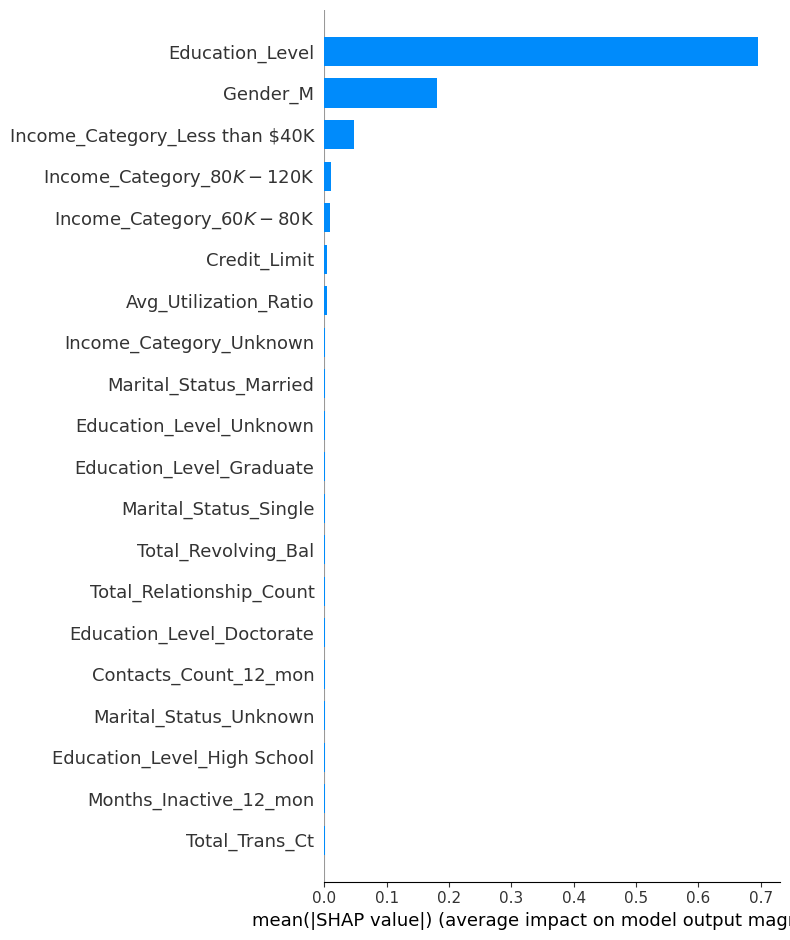

In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a copy of processed_features without the 'Cluster' column for fitting and prediction
features_for_clustering = processed_features.drop(columns=['Cluster'], errors='ignore')  # Ensure 'Cluster' is dropped if it exists

# Fit the KMeans model
shap_model = KMeans(n_clusters=3, random_state=42)
shap_model.fit(features_for_clustering)

# Assign clusters and add back to the DataFrame
processed_features['Cluster'] = shap_model.predict(features_for_clustering)

# Summarize the background data (reduce size for faster SHAP calculations)
background_data = shap.kmeans(features_for_clustering, 50)  # Summarize into 50 cluster centers

# Initialize SHAP KernelExplainer
explainer = shap.KernelExplainer(shap_model.predict, background_data)

# Select a subset of data for SHAP to explain
subset_for_shap = features_for_clustering.sample(100, random_state=42)
shap_values = explainer.shap_values(subset_for_shap)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, subset_for_shap, plot_type="bar")


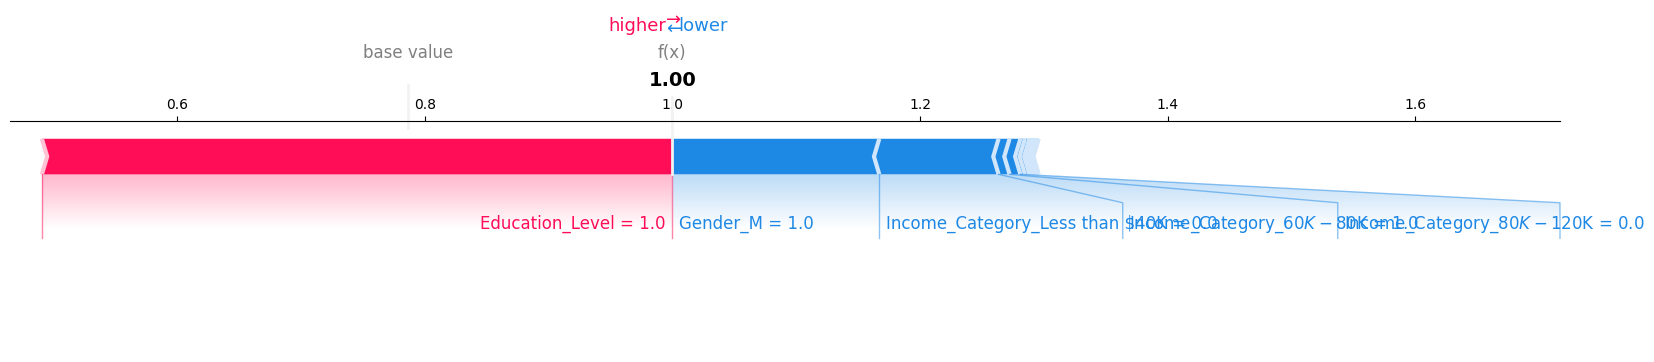

In [ ]:
shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    processed_features.drop(columns=['Cluster']).iloc[0],
    feature_names=processed_features.drop(columns=['Cluster']).columns,
    matplotlib=True
)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a proxy classifier
proxy_model = DecisionTreeClassifier(random_state=42)
proxy_model.fit(processed_features.drop(columns=['Cluster']), clusters)

# Use LIME with the proxy model
lime_explainer = lime_tabular.LimeTabularExplainer(
    processed_features.drop(columns=['Cluster']).values,
    feature_names=processed_features.drop(columns=['Cluster']).columns,
    class_names=['Cluster 0', 'Cluster 1', 'Cluster 2'],
    verbose=True,
    mode='classification'
)

# Explain a single instance
row_to_explain = 10
explanation = lime_explainer.explain_instance(
    processed_features.drop(columns=['Cluster']).iloc[row_to_explain].values,
    proxy_model.predict_proba,  # Use predict_proba for probabilities
    num_features=10
)

# Visualize the explanation
explanation.show_in_notebook()


Intercept 0.4075296075876663
Prediction_local [-0.13786423]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       903
           1       1.00      1.00      1.00       666
           2       1.00      1.00      1.00       465

    accuracy                           1.00      2034
   macro avg       1.00      1.00      1.00      2034
weighted avg       1.00      1.00      1.00      2034


Confusion Matrix:
[[903   0   0]
 [  0 665   1]
 [  0   2 463]]


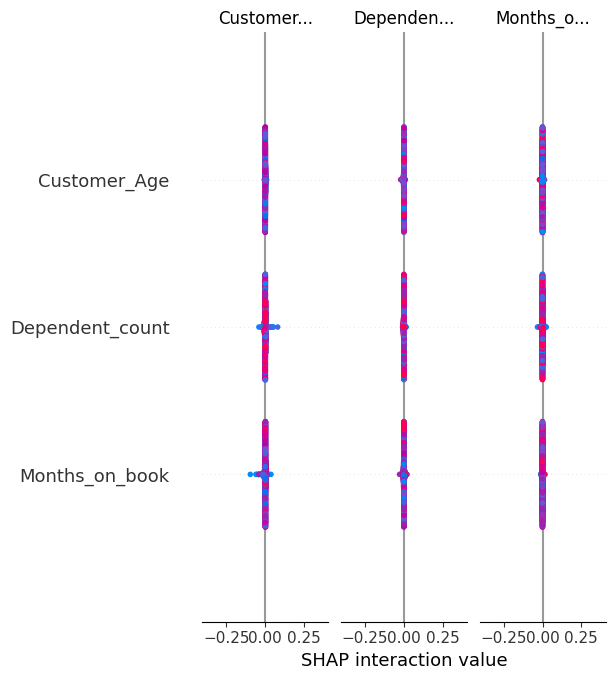

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data for training and testing
from sklearn.model_selection import train_test_split
X = processed_features.drop(columns=['Cluster'])
y = clusters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# SHAP Values for Prediction Explanation
import shap
shap_explainer = shap.TreeExplainer(rf_model)
shap_values_rf = shap_explainer.shap_values(X_test)

# Visualize SHAP Summary for Random Forest Predictions
shap.summary_plot(shap_values_rf, X_test, plot_type="bar")


In [ ]:
# Example new customer data (aligned with processed features)
new_customer = {
    'Customer_Age': 45,
    'Dependent_count': 2,
    'Months_on_book': 36,
    'Total_Relationship_Count': 5,
    'Months_Inactive_12_mon': 2,
    'Contacts_Count_12_mon': 3,
    'Credit_Limit': 20000,
    'Total_Revolving_Bal': 5000,
    'Total_Amt_Chng_Q4_Q1': 1.2,
    'Total_Trans_Amt': 15000,
    'Total_Trans_Ct': 80,
    'Total_Ct_Chng_Q4_Q1': 0.9,
    'Avg_Utilization_Ratio': 0.25,
    'Is_Fully_Inactive': 0,  # Binary feature
    # One-hot encoded features
    'Gender_M': 1,
    'Education_Level_Doctorate': 0,
    'Education_Level_Graduate': 1,
    'Education_Level_High School': 0,
    'Education_Level_Post-Graduate': 0,
    'Education_Level_Uneducated': 0,
    'Education_Level_Unknown': 0,
    'Marital_Status_Married': 0,
    'Marital_Status_Single': 1,
    'Marital_Status_Unknown': 0,
    'Income_Category_$40K - $60K': 0,
    'Income_Category_$60K - $80K': 0,
    'Income_Category_$80K - $120K': 0,
    'Income_Category_Less than $40K': 1,
    'Income_Category_Unknown': 0
}

# Convert to DataFrame
new_customer_df = pd.DataFrame([new_customer])

# Scale numerical features
numerical_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
    'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]
new_customer_df[numerical_features] = scaler.transform(new_customer_df[numerical_features])

# Ensure the column order matches the training set
# Fill missing columns with zeros (for consistency with one-hot encoding)
for col in X.columns:
    if col not in new_customer_df.columns:
        new_customer_df[col] = 0

# Reorder columns to match X.columns
new_customer_df = new_customer_df[X.columns]

# Predict cluster
predicted_cluster = rf_model.predict(new_customer_df)
print(f"Predicted Cluster: {predicted_cluster[0]}")


Predicted Cluster: 0


In [ ]:
from sklearn.model_selection import train_test_split

# Split processed_features into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, clusters, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict clusters for the test set
y_pred = rf_model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       903
           1       1.00      1.00      1.00       666
           2       1.00      1.00      1.00       465

    accuracy                           1.00      2034
   macro avg       1.00      1.00      1.00      2034
weighted avg       1.00      1.00      1.00      2034

Confusion Matrix:
[[903   0   0]
 [  0 665   1]
 [  0   2 463]]


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, clusters, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation Accuracy: 1.00 ± 0.00
